/var/folders/cj/rp40gtj13gj_m47t9g0by2b80000gn/T/ipykernel_19483/160553477.py:13: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  im = imageio.imread(parts[0])


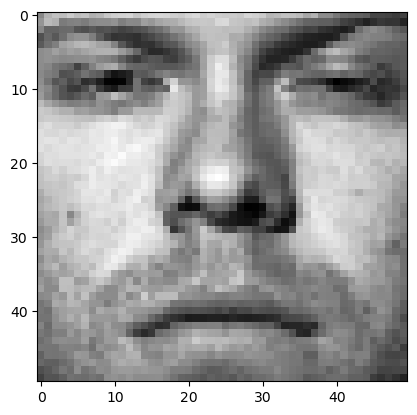

In [8]:
import numpy as np
import imageio
import matplotlib.pyplot as plt
import matplotlib.cm as cm

%matplotlib inline

train_labels, train_data = [], []

with open('./faces/train.txt', 'r') as file:
    for line in file:
        parts = line.strip().split()
        im = imageio.imread(parts[0])
        train_data.append(im.reshape(2500,))
        train_labels.append(int(parts[1]))

train_data, train_labels = np.array(train_data, dtype=float), np.array(train_labels, dtype=int)

plt.imshow(train_data[10, :].reshape(50, 50), cmap=cm.Greys_r)
plt.show()

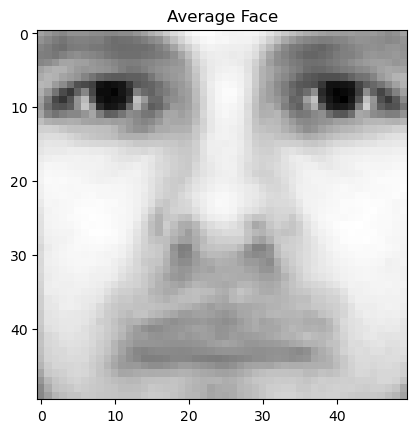

In [9]:
average_face = np.mean(train_data, axis=0)

plt.imshow(average_face.reshape(50, 50), cmap=cm.Greys_r)
plt.title("Average Face")
plt.show()

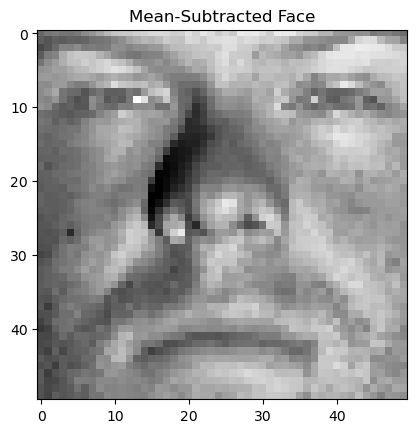

In [10]:
mean_subtracted_train_data = train_data - average_face

index = 1
mean_subtracted_train_face = mean_subtracted_train_data[index, :].reshape(50, 50)
plt.imshow(mean_subtracted_train_face, cmap=cm.Greys_r)
plt.title("Mean-Subtracted Face")
plt.show()

/var/folders/cj/rp40gtj13gj_m47t9g0by2b80000gn/T/ipykernel_19483/2401225429.py:6: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  im = imageio.imread(parts[0])


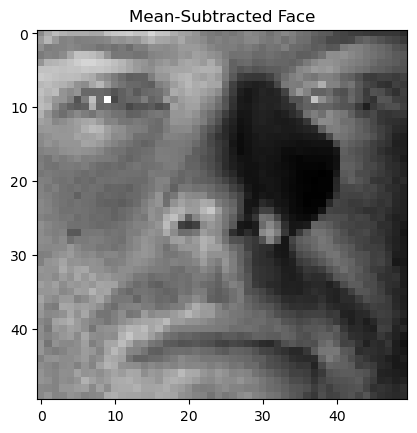

In [11]:
test_labels, test_data = [], []

with open('./faces/test.txt', 'r') as file:
    for line in file:
        parts = line.strip().split()
        im = imageio.imread(parts[0])
        test_data.append(im.reshape(2500,))
        test_labels.append(int(parts[1]))

test_data, test_labels = np.array(test_data, dtype=float), np.array(test_labels, dtype=int)


mean_subtracted_test_data = test_data - average_face


index = 1
mean_subtracted_test_face = mean_subtracted_test_data[index, :].reshape(50, 50)
plt.imshow(mean_subtracted_test_face, cmap=cm.Greys_r)
plt.title("Mean-Subtracted Face")
plt.show()

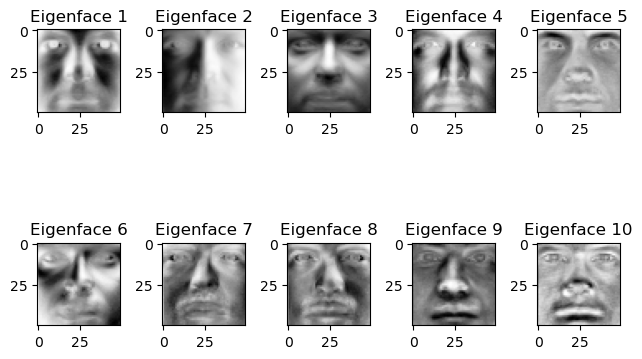

In [12]:
covariance_matrix_train = np.cov(mean_subtracted_train_data, rowvar=False)
eigenvalues_train, eigenvectors_train = np.linalg.eigh(covariance_matrix)


sorted_indices = np.argsort(eigenvalues_train)[::-1]
eigenvectors_train = eigenvectors_train[:, sorted_indices]

num_eigenfaces_to_display = 10
for i in range(num_eigenfaces_to_display):
    eigenface = eigenvectors_train[:, i].reshape(50, 50)
    plt.subplot(2, 5, i + 1)
    plt.imshow(eigenface, cmap=cm.Greys_r)
    plt.title(f"Eigenface {i + 1}")

plt.tight_layout()
plt.show()

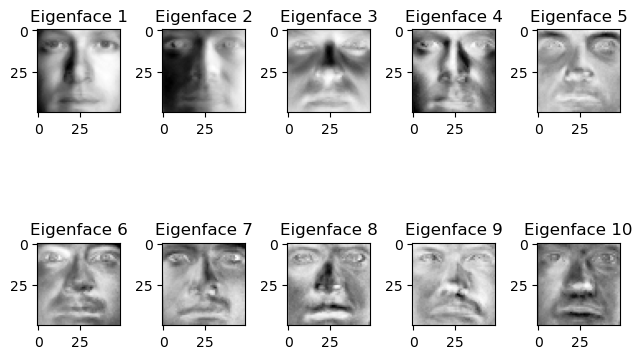

In [17]:
covariance_matrix_test = np.cov(mean_subtracted_test_data, rowvar=False)
eigenvalues_test, eigenvectors_test = np.linalg.eigh(covariance_matrix_test)


sorted_indices = np.argsort(eigenvalues_test)[::-1]
eigenvectors_test = eigenvectors_test[:, sorted_indices]

num_eigenfaces_to_display = 10
for i in range(num_eigenfaces_to_display):
    eigenface = eigenvectors_test[:, i].reshape(50, 50)
    plt.subplot(2, 5, i + 1)
    plt.imshow(eigenface, cmap=cm.Greys_r)
    plt.title(f"Eigenface {i + 1}")

plt.tight_layout()
plt.show()

In [78]:
def generate_feature_matrix(X, V, r):
    Vr = V.T[:r, :]
    F = np.dot(X, Vr.T)
    return F

def generate_feature_matrix_test(Xtest, V, r):
    Vr = V.T[:r, :]
    Ftest = np.dot(Xtest, Vr.T)
    return Ftest

r = 10
F = generate_feature_matrix(mean_subtracted_train_data, eigenvectors, r)
Ftest = generate_feature_matrix_test(mean_subtracted_test_data, eigenvectors, r)

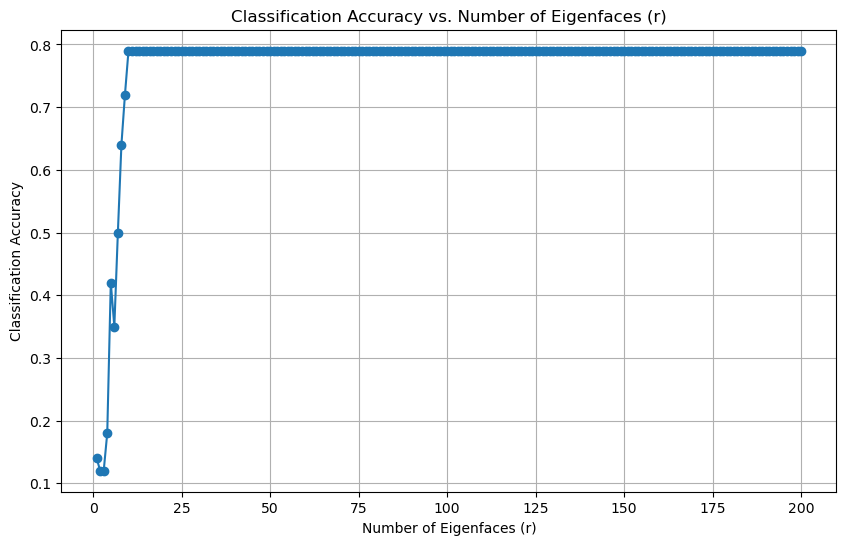

Classification Accuracy for r=10: 0.79


In [79]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

r_values = list(range(1, 201))  # r values from 1 to 200

accuracies = []

for r in r_values:
    F_r = F[:, :r]
    Ftest_r = Ftest[:, :r]

    model = LogisticRegression(solver='liblinear', multi_class='ovr')
    model.fit(F_r, train_labels)

    y_pred = model.predict(Ftest_r)

    accuracy = accuracy_score(test_labels, y_pred)
    accuracies.append(accuracy)

plt.figure(figsize=(10, 6))
plt.plot(r_values, accuracies, marker='o')
plt.title("Classification Accuracy vs. Number of Eigenfaces (r)")
plt.xlabel("Number of Eigenfaces (r)")
plt.ylabel("Classification Accuracy")
plt.grid(True)
plt.show()

chosen_r = 10
chosen_accuracy = accuracies[r_values.index(chosen_r)]
print(f"Classification Accuracy for r={chosen_r}: {chosen_accuracy}")


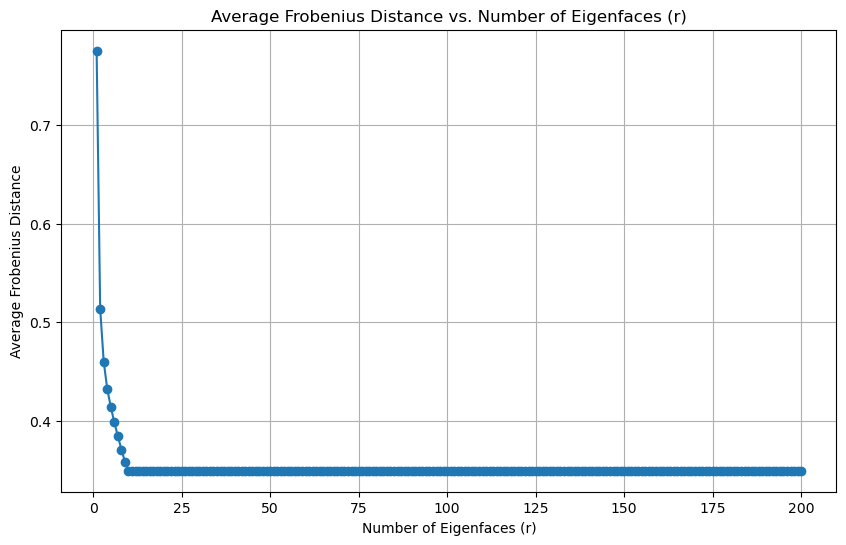

In [80]:
import numpy as np
import matplotlib.pyplot as plt

frobenius_distances = []
V=eigenvectors[:,:10]
X = mean_subtracted_train_data
X_approx = np.dot(F, V.T)

for r in range(1, 201):
    F_r = F[:, :r]
    V_r = V.T[:r, :]

    X_approx_r = np.dot(F_r, V_r)

    frobenius_distance = np.linalg.norm(X - X_approx_r, 'fro') / np.linalg.norm(X, 'fro')
    frobenius_distances.append(frobenius_distance)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 201), frobenius_distances, marker='o')
plt.title("Average Frobenius Distance vs. Number of Eigenfaces (r)")
plt.xlabel("Number of Eigenfaces (r)")
plt.ylabel("Average Frobenius Distance")
plt.grid(True)
plt.show()


In [57]:
faithful_df=pd.read_csv('./faithful.csv')
del faithful_df['Unnamed: 0']
faithful_df

,eruptions,waiting
0,3.600,79
1,1.800,54
2,3.333,74
3,2.283,62
4,4.533,85
...,...,...
267,4.117,81
268,2.150,46
269,4.417,90
270,1.817,46


In [76]:
import numpy as np
from scipy.stats import multivariate_normal as mvn
import matplotlib.pyplot as plt
import pandas as pd


def generateZ(mu,cov):
  x, y = np.meshgrid(np.linspace(1,6,1000),np.linspace(30,100,1000))
  xy = np.column_stack([x.flat, y.flat])
  Z = mvn.pdf(xy, mu, cov).reshape(x.shape)
  return x,y,Z


def Estep(df,mu,sigma,phi):
    X=df.to_numpy()
    K=sigma.shape[0]
    N=X.shape[0]
    gamma = np.zeros(shape=(N, K))
    
    for k in range(K):
        gamma[:, k] = mvn.pdf(X, mu[k], sigma[k]) * phi[k]
    
    gamma = gamma/np.sum(gamma, axis=1, keepdims=True)
    
    return gamma


def Mstep(df,gamma):
    X=df.to_numpy()
    N=X.shape[0]
    K=gamma.shape[1]
    
    phi = np.sum(gamma, axis=0)/np.sum(gamma)
    mu = X[np.random.choice(N, size=K, replace=False), :]
    sigma = np.zeros(shape=(K, X.shape[1], X.shape[1]), dtype=np.float128)
    
    for k in range(K):
        mu[k, :] = np.sum(gamma[:, k].reshape(-1,1) * X, axis=0) / np.sum(gamma[:, k], keepdims=True)
        sigma[k, :, :] = np.sum(gamma[:, k].reshape(-1, 1, 1) * ((X-mu[k, :]).reshape(N, X.shape[1], 1)@(X-mu[k, :]).reshape(N, 1, X.shape[1])), axis=0) /np.sum(gamma[:, k])
    
    return mu, sigma, phi


def logLikelihood(df,gamma,sigma,mu,phi):
    X = df.to_numpy()
    K = mu.shape[0]
    llh=0
    for k in range(K):
        llh += np.sum(gamma[:, k] * (np.log(mvn.pdf(X, mean=mu[k], cov=sigma[k])) + np.log(phi[k])))
    return llh


def EM(df, K, delta=0.001):
    X = df.to_numpy()
    N, D = X.shape
    mu = X[np.random.choice(N, size=K, replace=False), :]
    phi = np.ones(shape=(K), dtype=np.float128)/K
    sigma = np.zeros(shape=(K, D, D), dtype=np.float128)
    
    for d in range(D):
        sigma[:, d, d] = np.var(X[:, d])/10
        
    cur_llh = np.float128(1e9)
    prev_llh = 0.0
    iter = 0
    llh = []
    
    while(abs(cur_llh-prev_llh) > delta):
        gamma = Estep(df, mu, sigma, phi)
        mu, sigma, pi = Mstep(df, gamma)
        
        prev_llh = cur_llh
        cur_llh = logLikelihood(df, gamma, sigma, mu, phi)
        llh.append(cur_llh)
        
        iter=iter+1
        
        plt.figure()
        c=['blue','red','black']

        plt.scatter(faithful_df['eruptions'], faithful_df['waiting'],c=gamma[:,1],cmap='tab10')
        for i in range(0,K):
            x,y,z=generateZ(mu[i],sigma[i])
            plt.contour(x, y, z,colors=c[i])
        plt.show()

    print('Number of iterations: {}'.format(iter))
    return mu, sigma, pi, gamma, llh

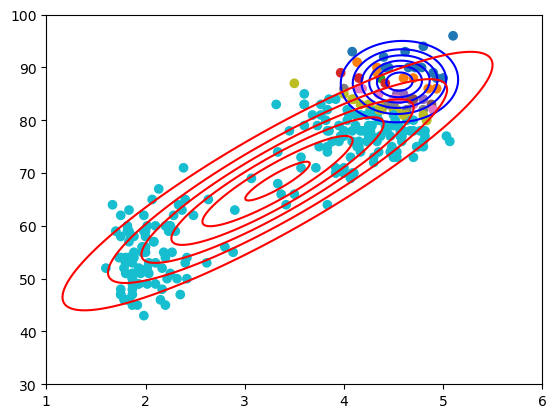

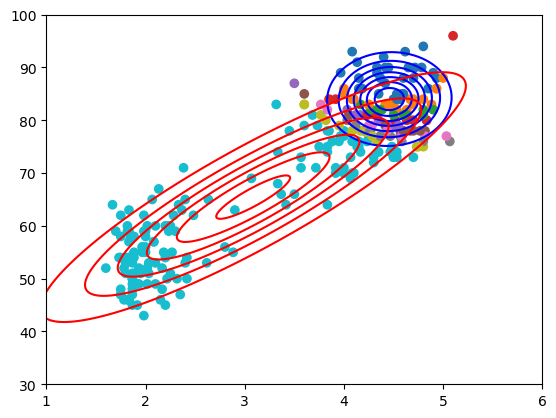

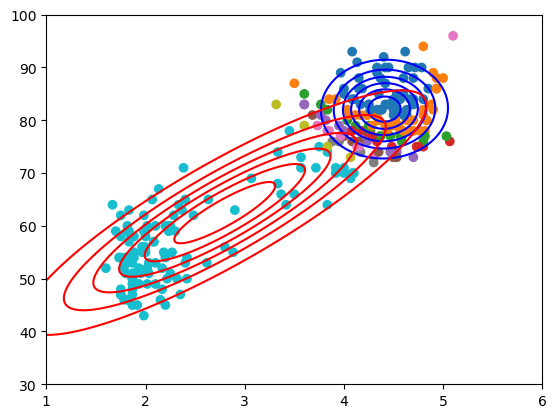

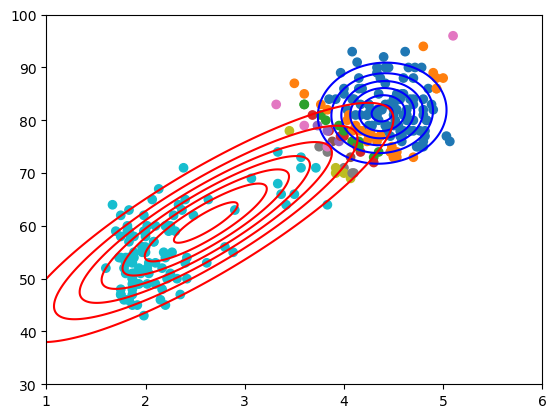

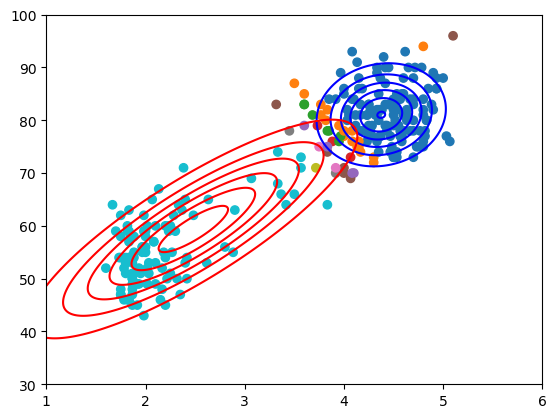

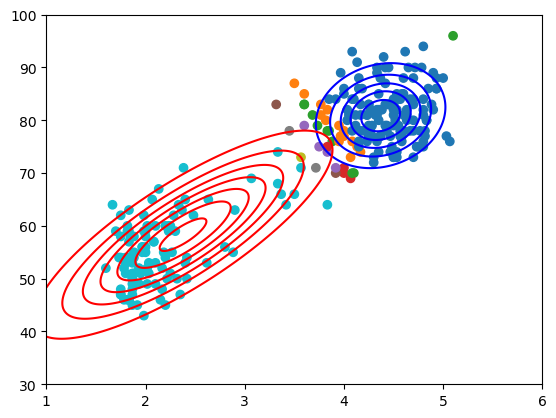

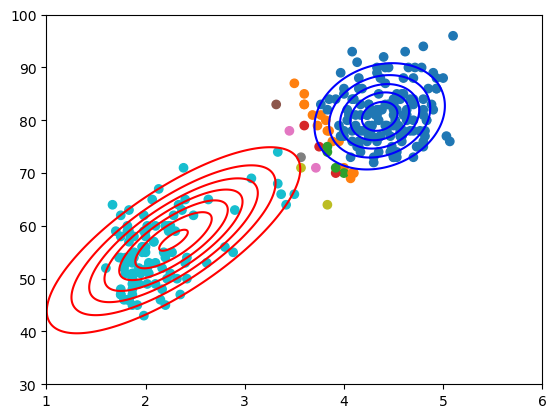

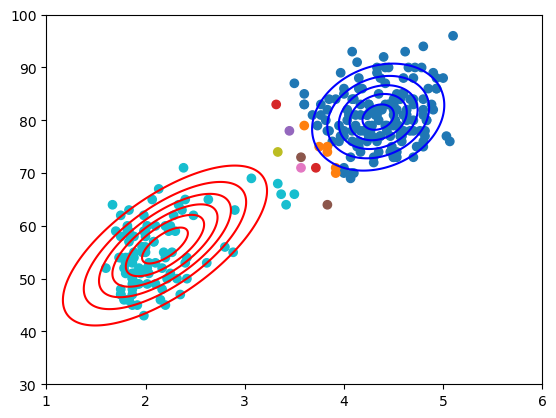

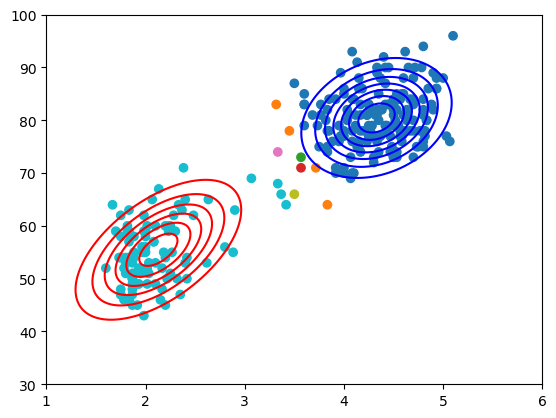

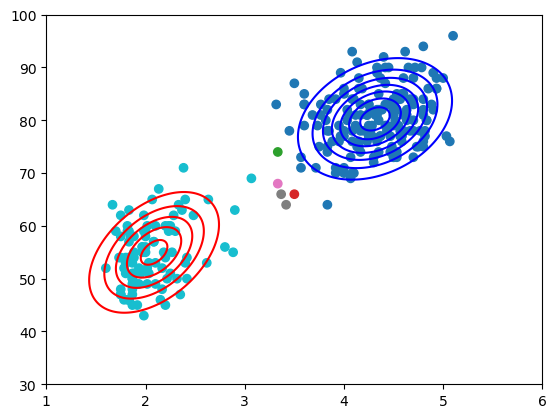

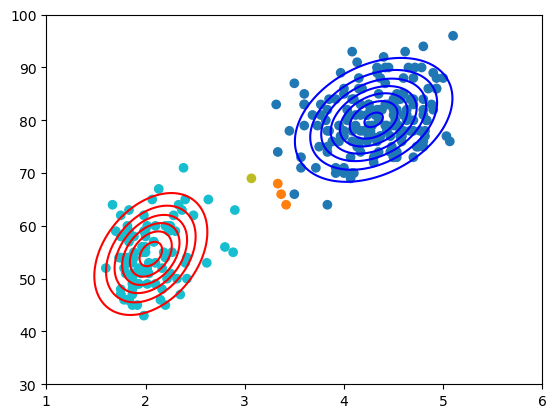

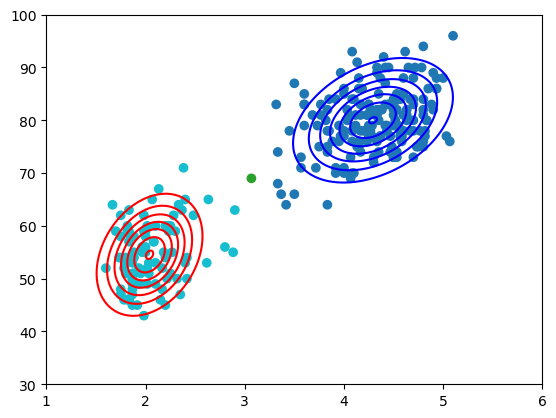

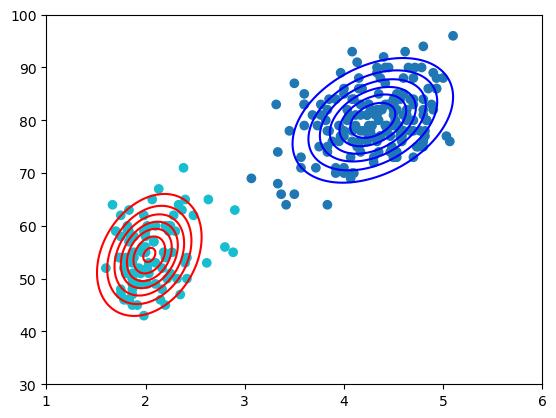

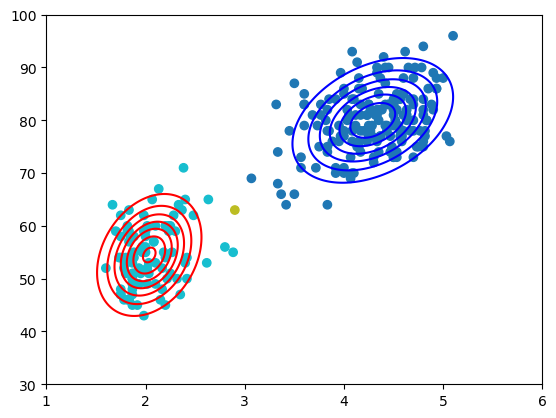

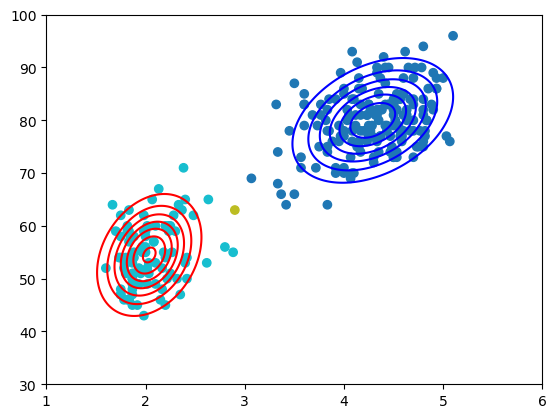

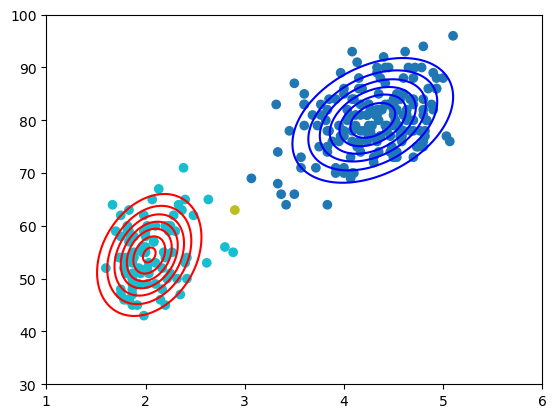

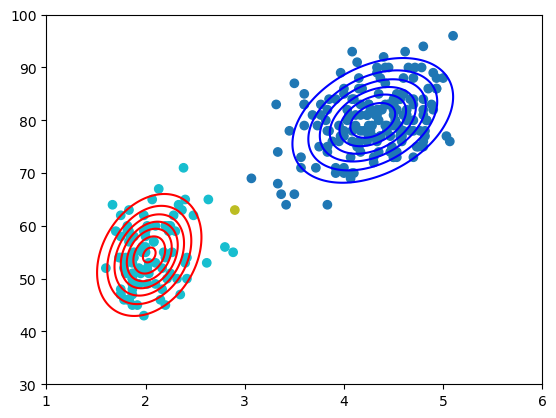

Number of iterations: 17


In [77]:
mu, sigma, pi, gamma, llh = EM(faithful_df,2)

0.0019076293984892844
0.005159515742373999


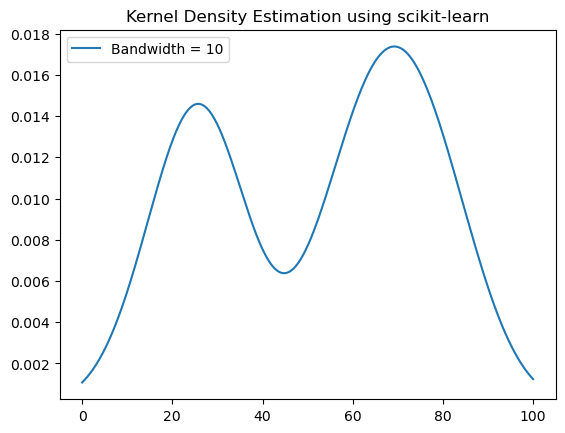

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KernelDensity

data = np.array([26, 30, 27, 18, 75, 66, 73, 63, 56, 83]).reshape(-1, 1)  # Reshape data to 2D array
x = np.linspace(0, 100, 1000).reshape(-1, 1)

bandwidths = [10]

for bandwidth in bandwidths:
    kde = KernelDensity(bandwidth=bandwidth, kernel='gaussian')
    kde.fit(data)
    log_dens = kde.score_samples(x)  # Calculate the log-density estimate

    # Convert log density to actual density
    p_x_10 = np.exp(log_dens)
    plt.plot(x, p_x_10, label=f"Bandwidth = {bandwidth}")

plt.legend()
plt.title("Kernel Density Estimation using scikit-learn")
plt.show()

0.0034721575026058563
0.00357114113642459


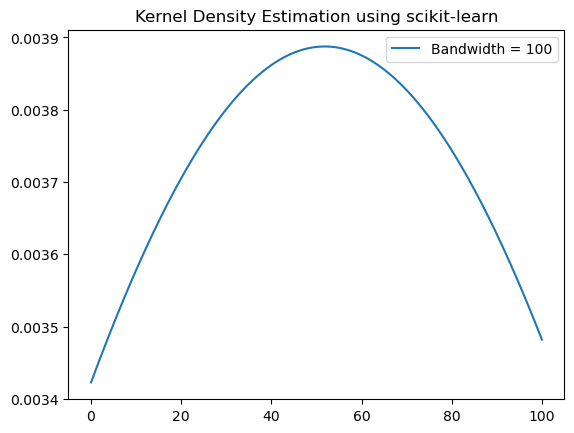

In [45]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KernelDensity

data = np.array([26, 30, 27, 18, 75, 66, 73, 63, 56, 83]).reshape(-1, 1)  # Reshape data to 2D array
x = np.linspace(0, 100, 1000).reshape(-1, 1)

bandwidths = [100]

for bandwidth in bandwidths:
    kde = KernelDensity(bandwidth=bandwidth, kernel='gaussian')
    kde.fit(data)
    log_dens = kde.score_samples(x)  # Calculate the log-density estimate

    # Convert log density to actual density
    p_x_100 = np.exp(log_dens)

    plt.plot(x, p_x_100, label=f"Bandwidth = {bandwidth}")

plt.legend()
plt.title("Kernel Density Estimation using scikit-learn")
plt.show()

In [39]:
"""δ = 10 is better since it retains more detailed information and closely follows the data distribution 
whereas δ = 100 reduces sensitivity to individual data points and thereby it has a Loss of fine details 
and local variations in the data"""

In [81]:
print(f"Probablity of new sample 30 for delta = 10 is {p_x_10[30]}")
print(f"Probablity of new sample 30 for delta = 10 is {p_x_10[95]}")
print(f"Probablity of new sample 30 for delta = 100 is {p_x_100[30]}")
print(f"Probablity of new sample 30 for delta = 100 is {p_x_100[95]}")

Probablity of new sample 30 for delta = 10 is 0.0
Probablity of new sample 30 for delta = 10 is 0.0049999999999999975
Probablity of new sample 30 for delta = 100 is 0.0034721575026058563
Probablity of new sample 30 for delta = 100 is 0.00357114113642459


In [ ]:
"""Rule: Calculate the kernel density estimate. Set a threshold for the estimated density. 
Points with estimated densities below this threshold are considered outliers

Failure Scenario:
Datasets with varying data densities. A fixed threshold may not be suitable for capturing 
the differences in local data density accurately. """

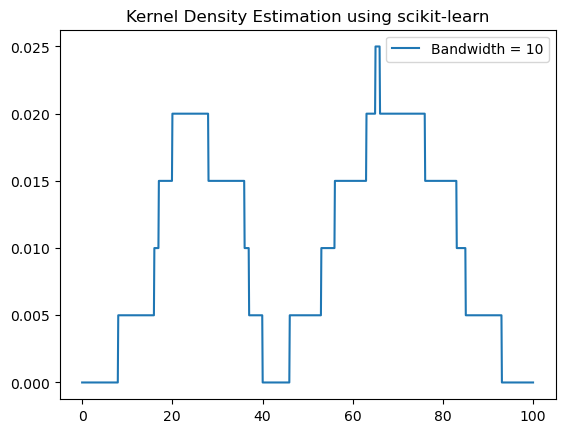

In [50]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KernelDensity

data = np.array([26, 30, 27, 18, 75, 66, 73, 63, 56, 83]).reshape(-1, 1)  # Reshape data to 2D array
x = np.linspace(0, 100, 1000).reshape(-1, 1)

bandwidths = [10]

for bandwidth in bandwidths:
    kde = KernelDensity(bandwidth=bandwidth, kernel='tophat')
    kde.fit(data)
    log_dens = kde.score_samples(x)  # Calculate the log-density estimate

    # Convert log density to actual density
    p_x_10 = np.exp(log_dens)
    plt.plot(x, p_x_10, label=f"Bandwidth = {bandwidth}")

plt.legend()
plt.title("Kernel Density Estimation using scikit-learn")
plt.show()

In [51]:
"""The piecewise constant nature of the Tophat kernel can lead to a highly variable density 
estimate, making it difficult to distinguish between the outlier and the true data distribution. """

'The piecewise constant nature of the Tophat kernel can lead to a highly variable density \nestimate, making it difficult to distinguish between the outlier and the true data distribution. '